# Support Vector Classifier

### Importing Libraries

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [2]:
# storing the complete dataset in iris
iris = datasets.load_iris()

### Getting independent and dependent variables

In [3]:
# we only take the first two features(sepal_length, sepal width)
X = iris.data[:, :2]

# Target variable "Species"
y = iris.target

### Visualising classification regions

The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [5]:
## create a mesh-grid to show the classification regions 

# defining limit for the x axis
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# defining limit for y axis
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 0.01 step size with respect to x limit
h = (x_max / x_min)/100

# defining the meshgrid with above parameters
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<img src = "h1ym5.png">

### Plotting the Regions

#### 1. Instantiating SVC (Default)

In [6]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X, y)

SVC()

We can see the default parameters of the SVM classifier as displayed above, the default kernel used is 'rbf'.
Let's visualise what it looks like.

#### plotting

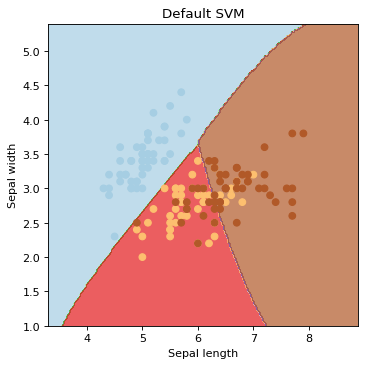

In [7]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVM')
plt.show()

#### 2. Linear SVM

In [8]:
svc = SVC(kernel = 'linear')
svc.fit(X, y)

SVC(kernel='linear')

#### plotting

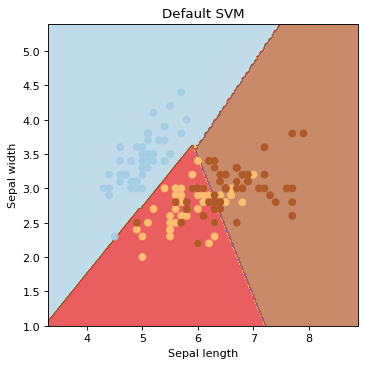

In [9]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default SVM')
plt.show()

We can clearly see that Linear SVM creates the classification curve which is linear or a straight line. therfore misclassification isunavoidable and prominent.

#### 3. SVM with polynomial kernel

In [10]:
svc = SVC(kernel = 'poly')
svc.fit(X, y)

SVC(kernel='poly')

#### plotting

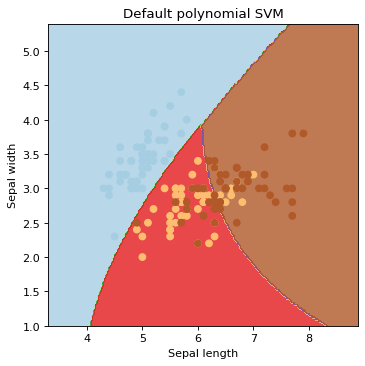

In [11]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Default polynomial SVM')
plt.show()

We can see that the polynomial kernel is able capture the nonlinear relation, the most prominent paramter with this kernel is the degree of polynomial features. So let's have a look at the different degrees.

#### Polynimial SVM with different degrees

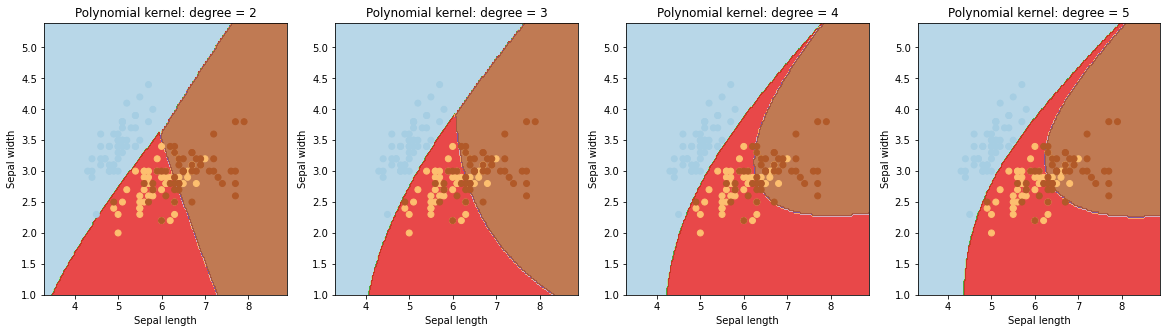

In [12]:
plt.figure(figsize = (20,5))


for i in range(2,6):
  svc = SVC(kernel = 'poly', degree = i)
  svc.fit(X, y)

  plt.subplot(1,4,i-1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('Polynomial kernel: degree = '+ str(i))

plt.show()

We can clearly see that as the degree of the polynomial increases, the separating line starts to exhibit a complex nature.
You can also notice that it took more than usual time to run the model with degree 5 for a dataset so small.
Which validates our claim that polynomial kernel requires high computational power.

#### SVM with 'rbf' / gaussian kernel

In [13]:
svc = SVC(kernel = 'rbf')
svc.fit(X, y)

SVC()

#### plotting

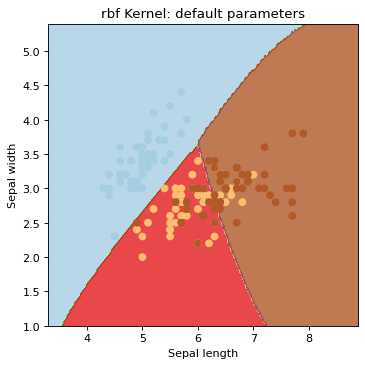

In [14]:
plt.figure(figsize = (5,5), dpi = 80)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('rbf Kernel: default parameters')
plt.show()

The parameters that governs the performance of the 'rbf' are the parameters "C" which is the regularisation parameter and "GAMMA" which is the distance of margin of the classifier.

Let' see see how these parameters affect the SVC model.

#### Change with respect to gamma ( C = constant)

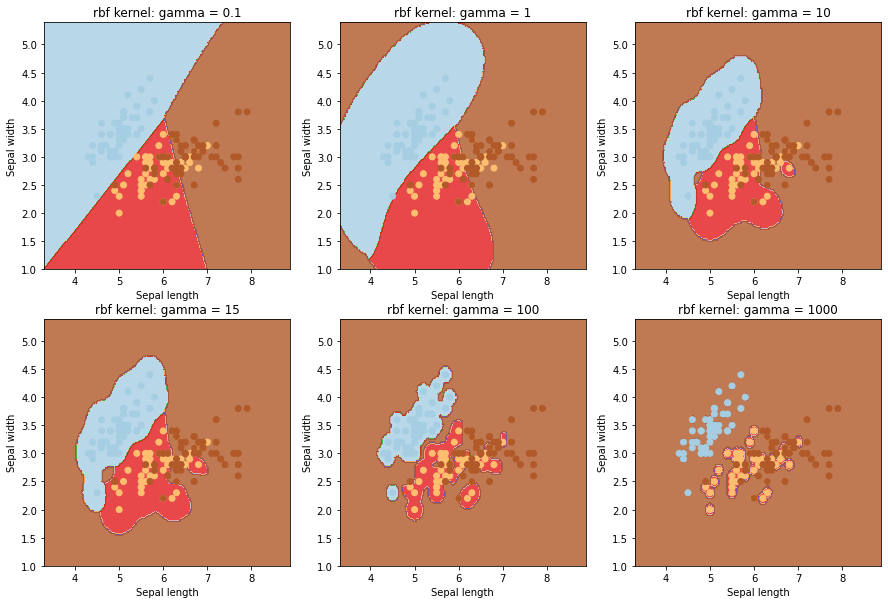

In [15]:
plt.figure(figsize = (15,10))

g = [0.1,1,10,15,100,1000]
for i in range(len(g)):
  svc = SVC(kernel = 'rbf', gamma = g[i])
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: gamma = '+ str(g[i]))

plt.show()

We can clearly see that taking a very small value of Gamma in SVC is similar to using the linear SVC, but as we increase the Value of the gamma , the classification process improves but starts to over fit if we take a very hight value of the GAMMA.

The important thing to note is the nature of overfitting when Gamma is 1000, each and everypoint is correctly classified and is almost perfectly isolated in circular classification curves.

#### Change with respect to C ( gamma = constant)

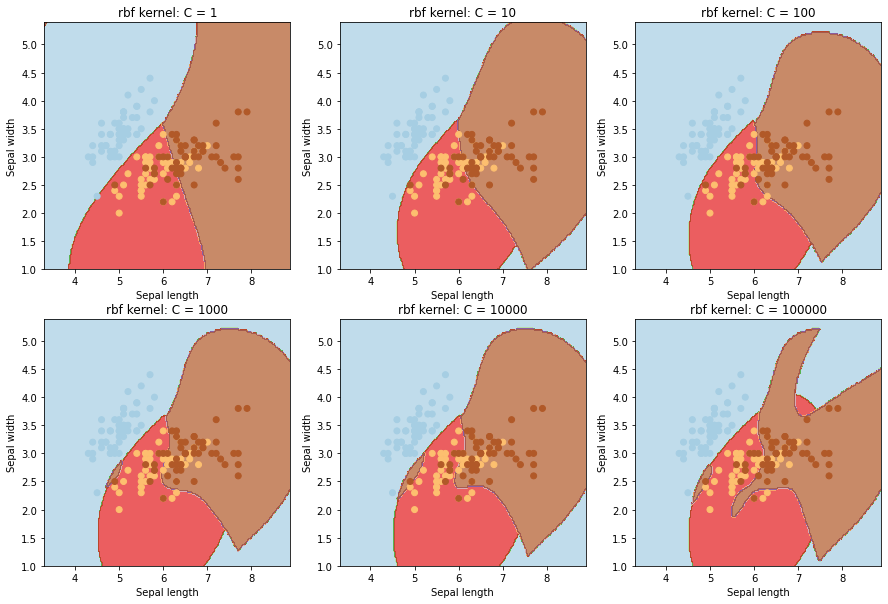

In [16]:
plt.figure(figsize = (15,10))

c =[1,10,100,1000,10000,100000]
for i in range(len(c)):
  svc = SVC(kernel = 'rbf', C = c[i], gamma=0.5)
  svc.fit(X, y)

  plt.subplot(2,3,i+1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

  
  plt.scatter(X[:, 0], X[:, 1] , c = y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title('rbf kernel: C = '+ str(c[i]))

plt.show()